In [1]:
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
import requests
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
# 정제된 데이터가져오기
df = pd.read_csv("df1_16.csv", encoding='utf-8')
df.head(1)


,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,15.0,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.70405


In [3]:
# 시군구 데이터 가져오기
cgoongoo=pd.read_csv("cgoongoo1.csv", encoding='utf-8')
cgoongoo.head(1)

,district,cgoongoo
0,1001453,11620


In [4]:
# 시군구와 정제된 데이터 머지
df1=pd.merge(df, cgoongoo, on=['district'])
df1.head()

,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio,cgoongoo
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.704050,11110
1,2018,1,1000001,CS100002,831.0,188508.0,0.473122,0.004000,0.504362,0.157013,...,1.0,0.0,0.0,16.0,38.0,0.0,176034744.0,0.324470,0.769975,11110
2,2018,1,1000001,CS100003,831.0,188508.0,0.440999,0.000000,0.653076,0.120070,...,0.0,0.0,0.0,16.0,38.0,0.0,45454124.0,0.358348,0.848584,11110
3,2018,1,1000001,CS100004,831.0,188508.0,0.575315,0.000597,0.325943,0.269932,...,0.0,0.0,0.0,16.0,38.0,0.0,351079289.0,0.494218,0.548148,11110
4,2018,1,1000001,CS100005,831.0,188508.0,0.503582,0.000282,0.612311,0.163809,...,1.0,0.0,0.0,16.0,38.0,0.0,163624875.0,0.490051,0.845680,11110


In [5]:
df1.columns

Index(['year', 'quarter', 'district', 'code', 'workpop', 'floatpop',
       'prop_2030s', 'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21',
       'prop_21_24', 'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price',
       'inc_monthly_avg', 'expnd_total', 'no_of_store', 'no_of_franch_store',
       'no_of_bank', 'no_of_pharm', 'no_of_theartre', 'no_of_accom',
       'no_of_STA', 'sales', 'sales_female_ratio', 'sales_weekday_ratio',
       'cgoongoo'],
      dtype='object')

In [6]:
df1.drop(['year','quarter','district'],axis=1,inplace=True)


In [11]:
df2=df1[['cgoongoo','code','sales', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio' ]]

In [19]:
# RobustScaling
x=df2[df2.columns[2:]]

rb = RobustScaler()
rb.fit(x)
X_robust_scaled = rb.transform(x)
dfX=pd.DataFrame(X_robust_scaled, columns= x.columns)
dfX.head(1)

,sales,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,prop_21_24,apt_no_of_cmplx,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,3.823946,0.688435,-0.068654,-0.069191,-0.176577,1.101822,-0.342549,0.101395,0.175034,-0.226415,...,-1.419405,3.0,0.0,0.0,-0.5,16.0,18.5,0.0,-0.258459,-0.225812


In [20]:
dfX.columns

Index(['sales', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11',
       'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio'],
      dtype='object')

In [21]:
dfX2=dfX.copy()
dfX2.drop(['sales'],axis=1,inplace=True)
dfX2.columns


Index(['workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales_female_ratio',
       'sales_weekday_ratio'],
      dtype='object')

In [23]:
# 서비스 코드 , 상권코드 콘캣
result=pd.concat([df2[['cgoongoo','code']],dfX], axis=1)
result

,cgoongoo,code,sales,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,11110,CS100001,3.823946,0.688435,-0.068654,-0.069191,-0.176577,1.101822,-0.342549,0.101395,...,-1.419405,3.00,0.0,0.0,-0.5,16.0,18.5,0.0,-0.258459,-0.225812
1,11110,CS100002,0.430625,0.688435,-0.068654,0.231894,-0.242064,1.583705,-0.315393,0.012080,...,-1.419405,0.00,1.0,0.0,-0.5,16.0,18.5,0.0,-0.349099,0.116008
2,11110,CS100003,-0.162879,0.688435,-0.068654,0.080263,-0.277150,2.325449,-0.497327,-0.493753,...,-1.419405,0.25,0.0,0.0,-0.5,16.0,18.5,0.0,-0.236543,0.523590
3,11110,CS100004,1.226222,0.688435,-0.068654,0.714289,-0.271913,0.693799,0.240692,0.310606,...,-1.419405,0.75,0.0,0.0,-0.5,16.0,18.5,0.0,0.214879,-1.034154
4,11110,CS100005,0.374220,0.688435,-0.068654,0.375678,-0.274675,2.122125,-0.281927,-0.607055,...,-1.419405,0.25,1.0,0.0,-0.5,16.0,18.5,0.0,0.201034,0.508535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88750,11620,CS300007,-0.291848,-0.439456,-0.268321,-1.728603,-0.277150,0.293735,0.728015,0.296157,...,0.260088,-0.50,0.0,0.0,1.0,0.0,-0.5,0.0,1.784239,1.044169
88751,11620,CS300008,-0.281234,-0.439456,-0.268321,-0.910033,-0.176557,0.308433,0.947466,0.002278,...,0.260088,0.00,1.0,0.0,1.0,0.0,-0.5,0.0,0.606271,0.244909
88752,11620,CS300009,1.467989,-0.439456,-0.268321,-0.848281,1.416219,0.529146,0.537374,-0.728386,...,0.260088,0.50,0.0,0.0,1.0,0.0,-0.5,0.0,0.252047,0.534120
88753,11620,CS300011,0.381695,-0.439456,-0.268321,-0.408931,0.030938,0.134869,0.457898,0.155373,...,0.260088,0.00,1.0,0.0,1.0,0.0,-0.5,0.0,1.086673,-0.243726


In [24]:
#서비스코드 더미화
result2 = pd.get_dummies(result)
result2.columns

Index(['cgoongoo', 'sales', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11',
       'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio', 'code_CS100001',
       'code_CS100002', 'code_CS100003', 'code_CS100004', 'code_CS100005',
       'code_CS100006', 'code_CS100007', 'code_CS100008', 'code_CS100009',
       'code_CS100010', 'code_CS200001', 'code_CS200002', 'code_CS200003',
       'code_CS200004', 'code_CS200005', 'code_CS200006', 'code_CS200007',
       'code_CS200008', 'code_CS200009', 'code_CS200010', 'code_CS200011',
       'code_CS200012', 'code_CS200013', 'code_CS200014', 'code_CS200015',
       'code_CS200016', 'code_CS200017', 'code_CS200018', 'code_CS300001',
       'code_CS300002', 'code_CS300003', 'co

In [25]:
result3 = pd.get_dummies(result2['cgoongoo'], prefix='d')
result3.columns

Index(['d_11110', 'd_11140', 'd_11170', 'd_11200', 'd_11215', 'd_11230',
       'd_11260', 'd_11290', 'd_11305', 'd_11320', 'd_11350', 'd_11380',
       'd_11410', 'd_11440', 'd_11470', 'd_11500', 'd_11530', 'd_11545',
       'd_11560', 'd_11590', 'd_11620', 'd_11650', 'd_11680', 'd_11710',
       'd_11740'],
      dtype='object')

In [26]:
result4 = pd.concat([result2,result3] ,axis=1)
result4.head()
result4.drop(['cgoongoo','sales'],axis=1,inplace=True )
result4.columns

Index(['workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales_female_ratio',
       'sales_weekday_ratio', 'code_CS100001', 'code_CS100002',
       'code_CS100003', 'code_CS100004', 'code_CS100005', 'code_CS100006',
       'code_CS100007', 'code_CS100008', 'code_CS100009', 'code_CS100010',
       'code_CS200001', 'code_CS200002', 'code_CS200003', 'code_CS200004',
       'code_CS200005', 'code_CS200006', 'code_CS200007', 'code_CS200008',
       'code_CS200009', 'code_CS200010', 'code_CS200011', 'code_CS200012',
       'code_CS200013', 'code_CS200014', 'code_CS200015', 'code_CS200016',
       'code_CS200017', 'code_CS200018', 'code_CS300001', 'code_CS300002',
       'code_CS300003', 'code_CS300004', 'code_C

In [28]:
import numpy as np
np.log(df2['sales'])

0        20.642729
1        18.986192
2        17.632214
3        19.676523
4        18.913087
           ...    
88750    16.653345
88751    16.781513
88752    19.817599
88753    18.923088
88754    17.279852
Name: sales, Length: 88755, dtype: float64

In [29]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df2['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     594.0
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:26:53   Log-Likelihood:            -1.0216e+05
No. Observations:               62128   AIC:                         2.045e+05
Df Residuals:                   62037   BIC:                         2.053e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.4768    

In [30]:
# 모델 생성
lm = linear_model.LinearRegression()

# 학습
lm.fit(X_train, y_train)

# 예측
pred_y = lm.predict(X_train)

print("정확도 : ", str(round(lm.score(X_test, y_test), 4) * 100) + "%")

정확도 :  46.28%


In [31]:
# LASSO 모형
#importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [32]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.001048
Best score using built-in LassoCV: 0.461617


In [33]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 79 variables and eliminated the other 13 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

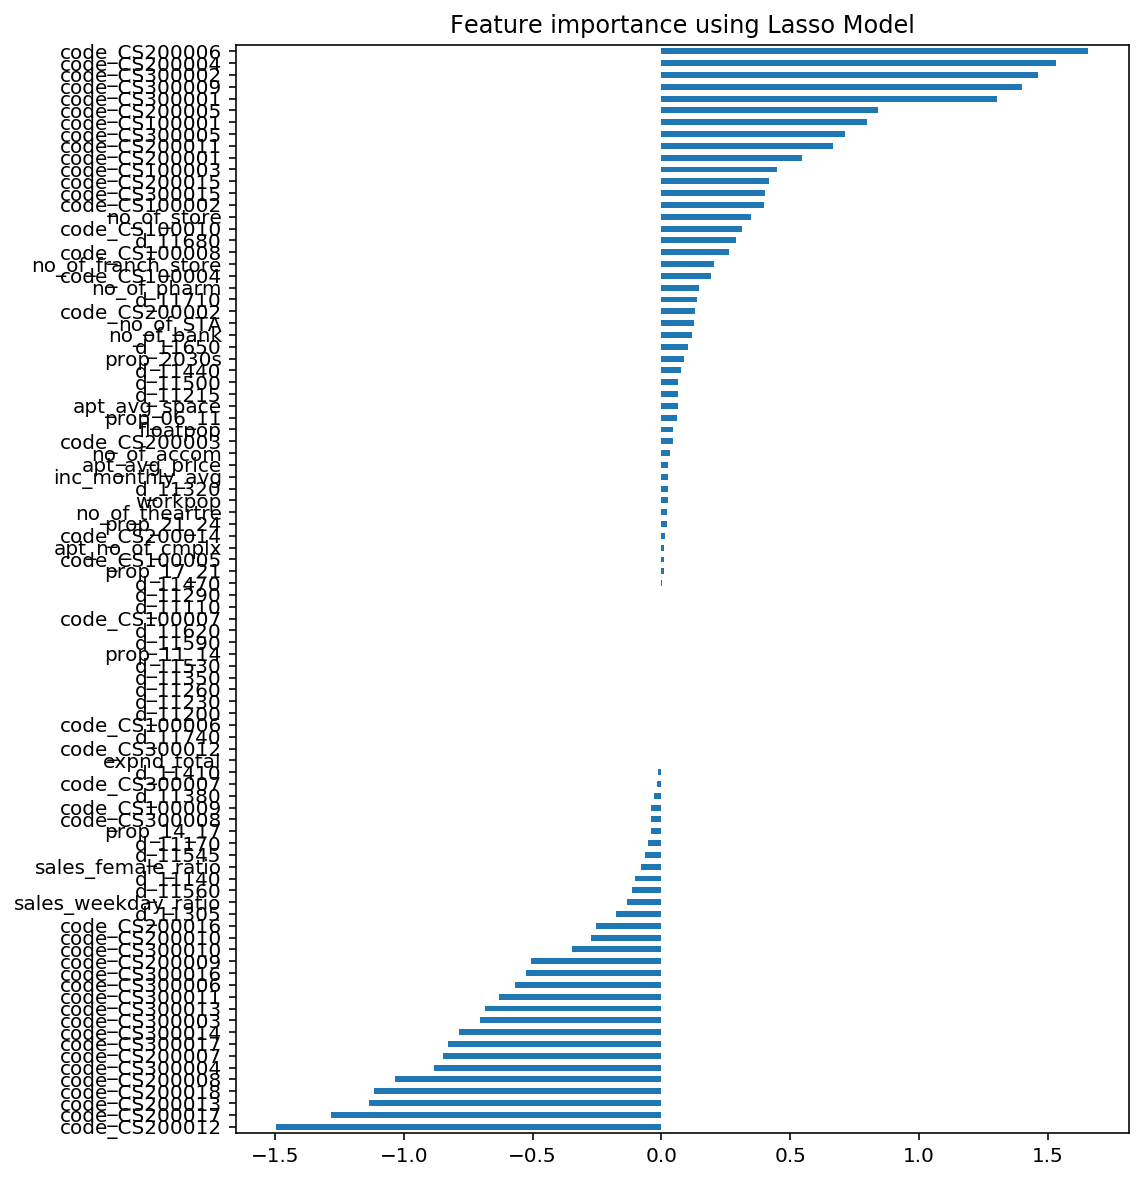

In [34]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [35]:
drop_columns=imp_coef[imp_coef.values==0].index

In [36]:
result4.drop(columns=drop_columns,inplace=True )


In [37]:
result4.columns

Index(['workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_14_17',
       'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 'sales_female_ratio', 'sales_weekday_ratio',
       'code_CS100001', 'code_CS100002', 'code_CS100003', 'code_CS100004',
       'code_CS100005', 'code_CS100008', 'code_CS100009', 'code_CS100010',
       'code_CS200001', 'code_CS200002', 'code_CS200003', 'code_CS200004',
       'code_CS200005', 'code_CS200006', 'code_CS200007', 'code_CS200008',
       'code_CS200009', 'code_CS200010', 'code_CS200011', 'code_CS200012',
       'code_CS200013', 'code_CS200014', 'code_CS200015', 'code_CS200016',
       'code_CS200017', 'code_CS200018', 'code_CS300001', 'code_CS300002',
       'code_CS300003', 'code_CS300004', 'code_CS300005', 'code_CS300006',
       'code_CS300007', 'cod

In [39]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df2['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     676.5
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:27:14   Log-Likelihood:            -1.0217e+05
No. Observations:               62128   AIC:                         2.045e+05
Df Residuals:                   62048   BIC:                         2.052e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.5494    

In [40]:
#오차합 구하기
y_pred = result .predict(X_test)
resid=y_test-y_pred
rss=np.sum(resid**2)
MSE=rss/(result.nobs-2)

#RMSE 구하기
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_test, y_pred)
MSE, rmse

(0.6706212421604806, 1.2508759133448542)

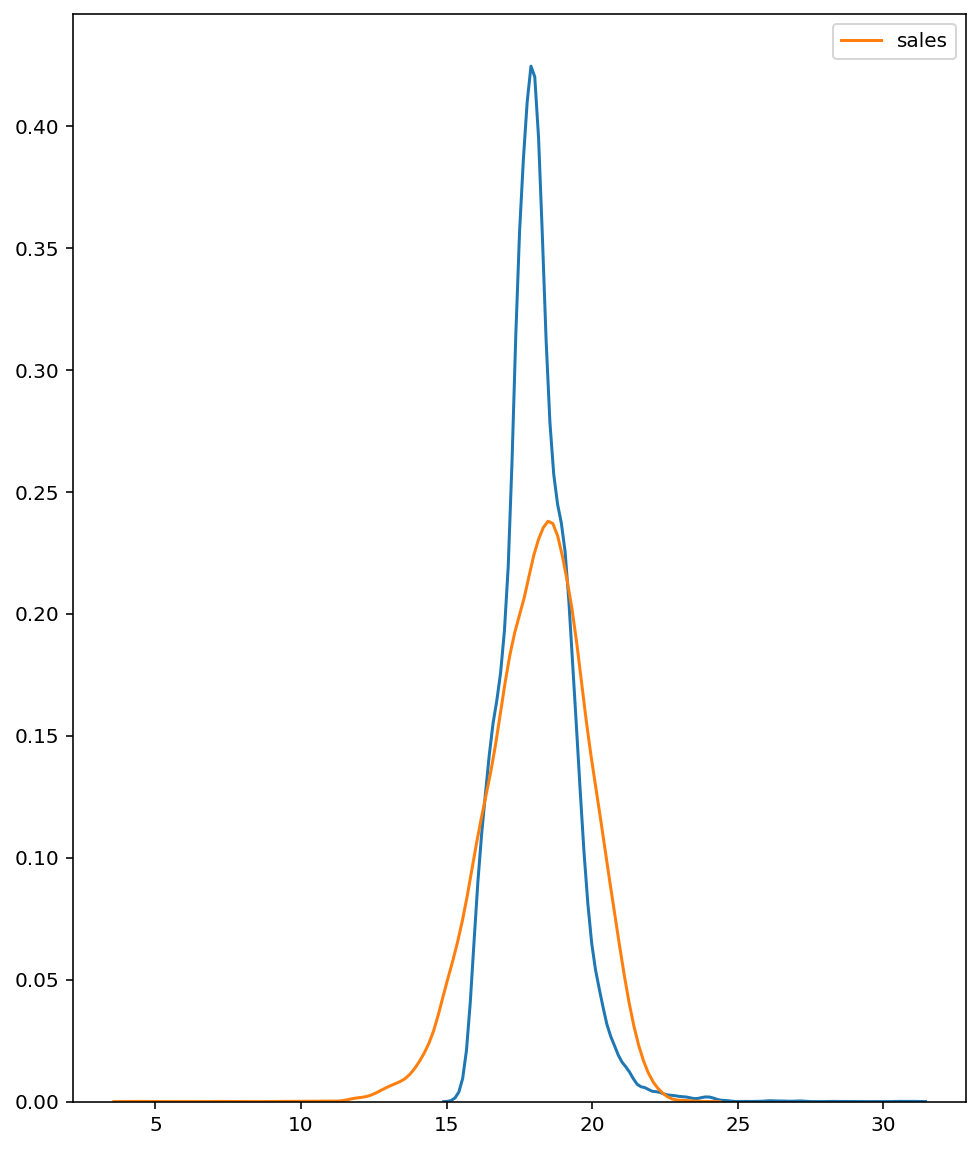

In [41]:
y_pred = result .predict(X_test)
sns.kdeplot(y_pred)
sns.kdeplot(y_test)
# plt.title("")
plt.show()


In [42]:
# 파랑색: 모델링으로 예측한 y_pred 값
# 오렌지: 원래 sales 값

#### 1. 과최적화 일어났는지 K-fold 교차검증

In [44]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df2['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     676.5
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:27:30   Log-Likelihood:            -1.0217e+05
No. Observations:               62128   AIC:                         2.045e+05
Df Residuals:                   62048   BIC:                         2.052e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.5494    

In [45]:
from sklearn.model_selection import KFold

df_kfold=pd.concat([y,X], axis=1)
train_r2=[]
test_r2 =[]
scores = np.zeros(5)
cv = KFold(5, shuffle=True)
for i, (idx_train, idx_test) in enumerate(cv.split( df_kfold)):
    df_train =  df_kfold.iloc[idx_train]
    df_test =  df_kfold.iloc[idx_test]
    
    model = sm.OLS.from_formula("sales ~"+"+".join(df_kfold.columns[1:]), data= df_kfold)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = (( df_kfold.sales - pred) ** 2).sum()
    tss = (( df_kfold.sales -  df_kfold.sales.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    train_r2.append(result.rsquared)
    test_r2.append(rsquared)
    


학습 R2 = 0.46300628, 검증 R2 = 0.88880392
학습 R2 = 0.46300628, 검증 R2 = 0.89292329
학습 R2 = 0.46300628, 검증 R2 = 0.89534736
학습 R2 = 0.46300628, 검증 R2 = 0.89192173
학습 R2 = 0.46300628, 검증 R2 = 0.89400999


(0.5, 1.2)

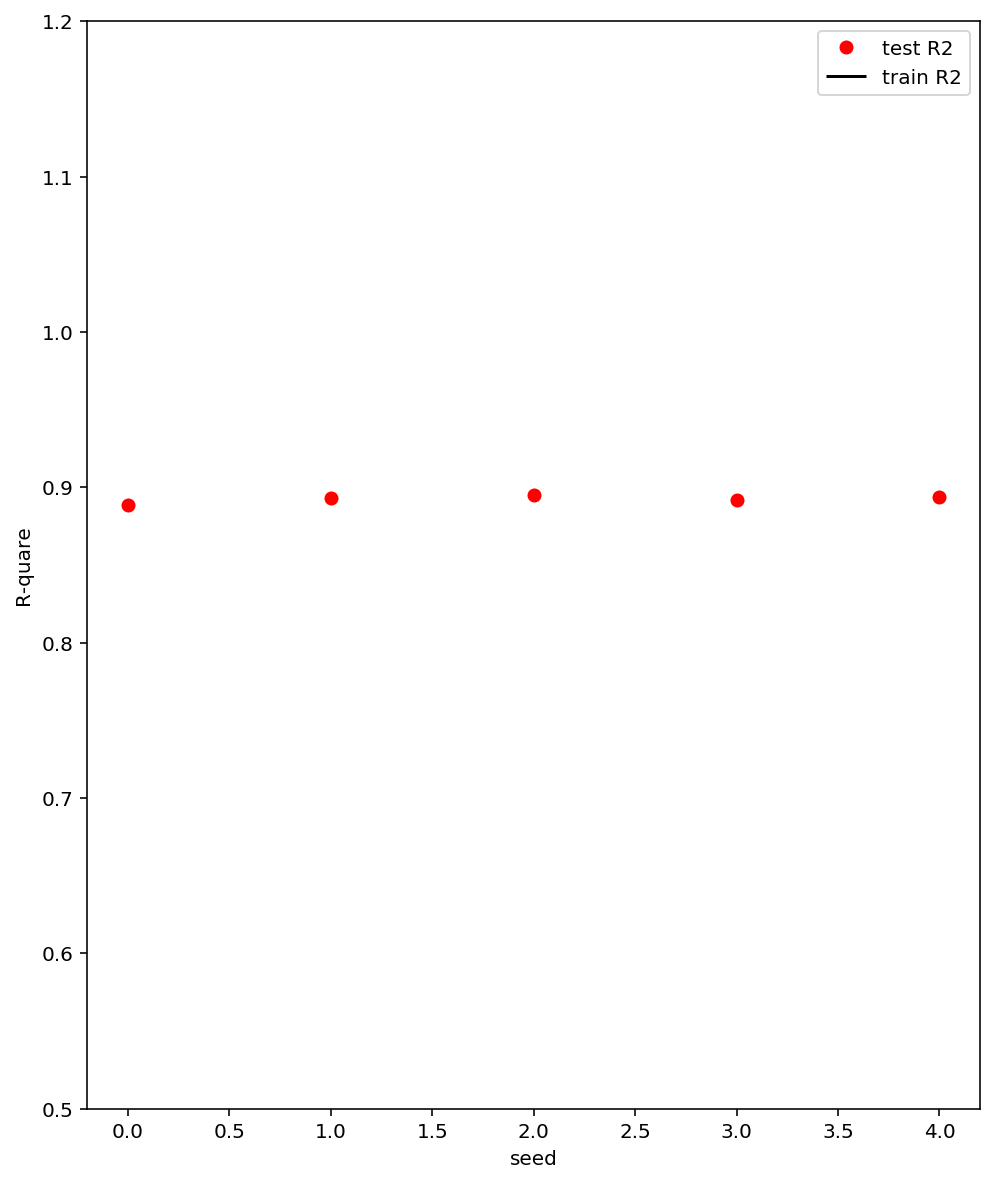

In [46]:

plt.plot(test_r2, 'ro', label="test R2")
plt.hlines(train_r2, 0, 4, label="train R2")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-quare")

plt.ylim(0.5, 1.2)